### This notebook will look at the effect of quantitative easing on US equities across different group of stocks like value and growth, while also bringing in a cross-asset view through gold and bitcoin in the same time period. The analysis tries to view the best performing stocks during periods of rapid money printing and liquidity injection done by the Fed. The analysis will use cross-assets as a simulus-agnostic metric to view true increase/decrease in stocks across this time period. 

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import performanceanalytics.statistics as pas 

### Section: Data Import and Cleaning

In [350]:
BRK_price = pd.read_csv("Data/BRK-A.csv")
SPY_price = pd.read_csv("Data/SPY.csv")
SPY_daily = pd.read_csv("Data/S&P500Historical.csv")
SPY_divs = pd.read_csv("Data/SPY-dividends.csv")
VPU_price = pd.read_csv("Data/VPU.csv")
VPU_divs = pd.read_csv("Data/VPU-dividends.csv")
VTV_price = pd.read_csv("Data/VTV.csv")
VTV_divs = pd.read_csv("Data/VTV-dividends.csv")
VUG_price = pd.read_csv("Data/VUG.csv")
VUG_divs = pd.read_csv("Data/VUG-dividends.csv")
SPYG_price = pd.read_csv("Data/SPYG.csv")
SPYG_divs = pd.read_csv("Data/SPYG-dividends.csv")
SPYV_price = pd.read_csv("Data/SPYV.csv")
SPYV_divs = pd.read_csv("Data/SPYV-dividends.csv")
XLU_price = pd.read_csv("Data/XLU.csv")
XLU_divs = pd.read_csv("Data/XLU-dividends.csv")
Gold_price = pd.read_excel("Data/GoldPrices.xlsx")
BTC_price = pd.read_csv("Data/BTC.csv")
Gold_daily = pd.read_excel("Data/GoldPrices-Daily.xlsx")

In [351]:
BTC_price['Price'] = BTC_price['Price'].str.replace(',','')
BTC_price['Actual_Price'] = pd.to_numeric(BTC_price['Price'])
Gold_price['Actual_Price'] = Gold_price['Price']
BTC_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 8 columns):
Date            3628 non-null object
Price           3628 non-null object
Open            3628 non-null object
High            3628 non-null object
Low             3628 non-null object
Vol.            3628 non-null object
Change %        3628 non-null object
Actual_Price    3628 non-null float64
dtypes: float64(1), object(7)
memory usage: 226.9+ KB


In [352]:
Gold_daily['Actual_Price'] = Gold_daily['Actual_Price'].fillna(method='ffill')

In [353]:
BRK_price['Date'] = pd.to_datetime(BRK_price['Date']) 
SPY_price['Date'] = pd.to_datetime(SPY_price['Date']) 
SPY_divs['Date'] = pd.to_datetime(SPY_divs['Date'])
SPY_daily['Date'] = pd.to_datetime(SPY_daily['Date'])
SPYG_price['Date'] = pd.to_datetime(SPYG_price['Date']) 
SPYG_divs['Date'] = pd.to_datetime(SPYG_divs['Date']) 
SPYV_price['Date'] = pd.to_datetime(SPYV_price['Date']) 
SPYV_divs['Date'] = pd.to_datetime(SPYV_divs['Date']) 
XLU_price['Date'] = pd.to_datetime(XLU_price['Date']) 
XLU_divs['Date'] = pd.to_datetime(XLU_divs['Date']) 

VPU_price['Date'] = pd.to_datetime(VPU_price['Date']) 
VPU_divs['Date'] = pd.to_datetime(VPU_divs['Date']) 
VTV_price['Date'] = pd.to_datetime(VTV_price['Date']) 
VTV_divs['Date'] = pd.to_datetime(VTV_divs['Date']) 
VUG_price['Date'] = pd.to_datetime(VUG_price['Date']) 
VUG_divs['Date'] = pd.to_datetime(VUG_divs['Date']) 
Gold_price['Date'] = pd.to_datetime(Gold_price['Date']) 
BTC_price['Date'] = pd.to_datetime(BTC_price['Date']) 
Gold_daily['Date'] = pd.to_datetime(Gold_daily['Date'])

#### Adding back dividends

In [354]:
def generate_month_year(df):
    df = df.sort_values(by='Date',ascending=True)
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

In [355]:
SPY_price = generate_month_year(SPY_price)
SPY_divs = generate_month_year(SPY_divs)

VPU_price = generate_month_year(VPU_price)
VPU_divs = generate_month_year(VPU_divs)

VTV_price = generate_month_year(VTV_price)
VTV_divs = generate_month_year(VTV_divs)

VUG_price = generate_month_year(VUG_price)
VUG_divs = generate_month_year(VUG_divs)

In [356]:
SPY_price = SPY_price.merge(SPY_divs, on=['Month','Year'], how='left')
SPY_price['Dividends'].fillna(0,inplace=True)
SPY_price['Date'] = SPY_price['Date_x']

VPU_price = VPU_price.merge(VPU_divs, on=['Month','Year'], how='left')
VPU_price['Dividends'].fillna(0,inplace=True)
VPU_price['Date'] = VPU_price['Date_x']

VTV_price = VTV_price.merge(VTV_divs, on=['Month','Year'], how='left')
VTV_price['Dividends'].fillna(0,inplace=True)
VTV_price['Date'] = VTV_price['Date_x']

VUG_price = VUG_price.merge(VUG_divs, on=['Month','Year'], how='left')
VUG_price['Dividends'].fillna(0,inplace=True)
VUG_price['Date'] = VUG_price['Date_x']

In [357]:
SPYG_price = SPYG_price.merge(SPYG_divs, left_on='Date',right_on='Date', how='left')
SPYG_price['Dividends'].fillna(0,inplace=True)

SPYV_price = SPYV_price.merge(SPYV_divs, left_on='Date',right_on='Date', how='left')
SPYV_price['Dividends'].fillna(0,inplace=True)

XLU_price = XLU_price.merge(XLU_divs, left_on='Date',right_on='Date', how='left')
XLU_price['Dividends'].fillna(0,inplace=True)

In [358]:
SPY_daily = SPY_daily.merge(SPY_divs, left_on='Date',right_on='Date', how='left')
SPY_daily['Dividends'].fillna(0,inplace=True)

#### Get the true price of stock by adding back dividends

In [359]:
SPY_price['Actual_Price'] = SPY_price['Adj Close'] + SPY_price['Dividends']
SPY_daily['Actual_Price'] = SPY_daily['Adj Close'] + SPY_daily['Dividends']
VPU_price['Actual_Price'] = VPU_price['Adj Close'] + VPU_price['Dividends']
VTV_price['Actual_Price'] = VTV_price['Adj Close'] + VTV_price['Dividends']
VUG_price['Actual_Price'] = VUG_price['Adj Close'] + VUG_price['Dividends']
BRK_price['Actual_Price'] = BRK_price['Adj Close']
SPYG_price['Actual_Price'] = SPYG_price['Adj Close'] + SPYG_price['Dividends']
SPYV_price['Actual_Price'] = SPYV_price['Adj Close'] + SPYV_price['Dividends']
XLU_price['Actual_Price'] = XLU_price['Adj Close'] + XLU_price['Dividends']

SPY_price.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Month,Year,Date_y,Dividends,Date,Actual_Price
0,1993-01-01,43.96875,43.96875,43.75000,43.93750,26.184059,1003200,1,1993,NaT,0.0,1993-01-01,26.184059
1,1993-02-01,43.96875,45.12500,42.81250,44.40625,26.463404,5417600,2,1993,NaT,0.0,1993-02-01,26.463404
2,1993-03-01,44.56250,45.84375,44.21875,45.18750,26.928963,3019200,3,1993,NaT,0.0,1993-03-01,26.928963
3,1993-04-01,45.25000,45.25000,43.28125,44.03125,26.363844,2697200,4,1993,NaT,0.0,1993-04-01,26.363844
4,1993-05-01,44.09375,45.65625,43.84375,45.21875,27.074867,1808000,5,1993,NaT,0.0,1993-05-01,27.074867


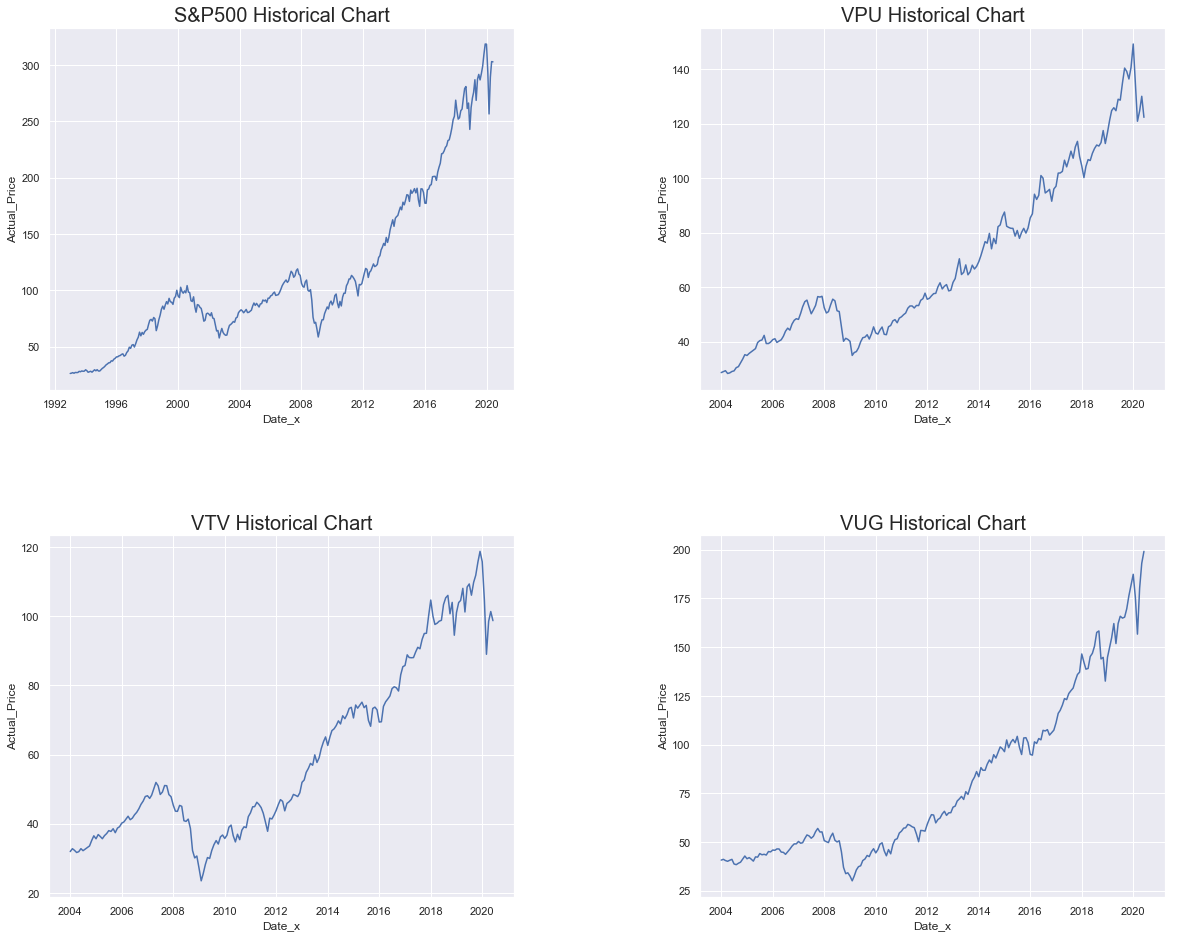

In [360]:
sns.set(rc={'figure.figsize':(20,16)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.lineplot(x='Date_x', y='Actual_Price', data=SPY_price, ax=ax).set_title('S&P500 Historical Chart', size=20)
ax = fig.add_subplot(2, 2, 2)
sns.lineplot(x='Date_x', y='Actual_Price', data=VPU_price, ax=ax).set_title('VPU Historical Chart', size=20)
ax = fig.add_subplot(2, 2, 3)
sns.lineplot(x='Date_x', y='Actual_Price', data=VTV_price, ax=ax).set_title('VTV Historical Chart', size=20)
ax = fig.add_subplot(2, 2, 4)
sns.lineplot(x='Date_x', y='Actual_Price', data=VUG_price, ax=ax).set_title('VUG Historical Chart', size=20)
plt.show()

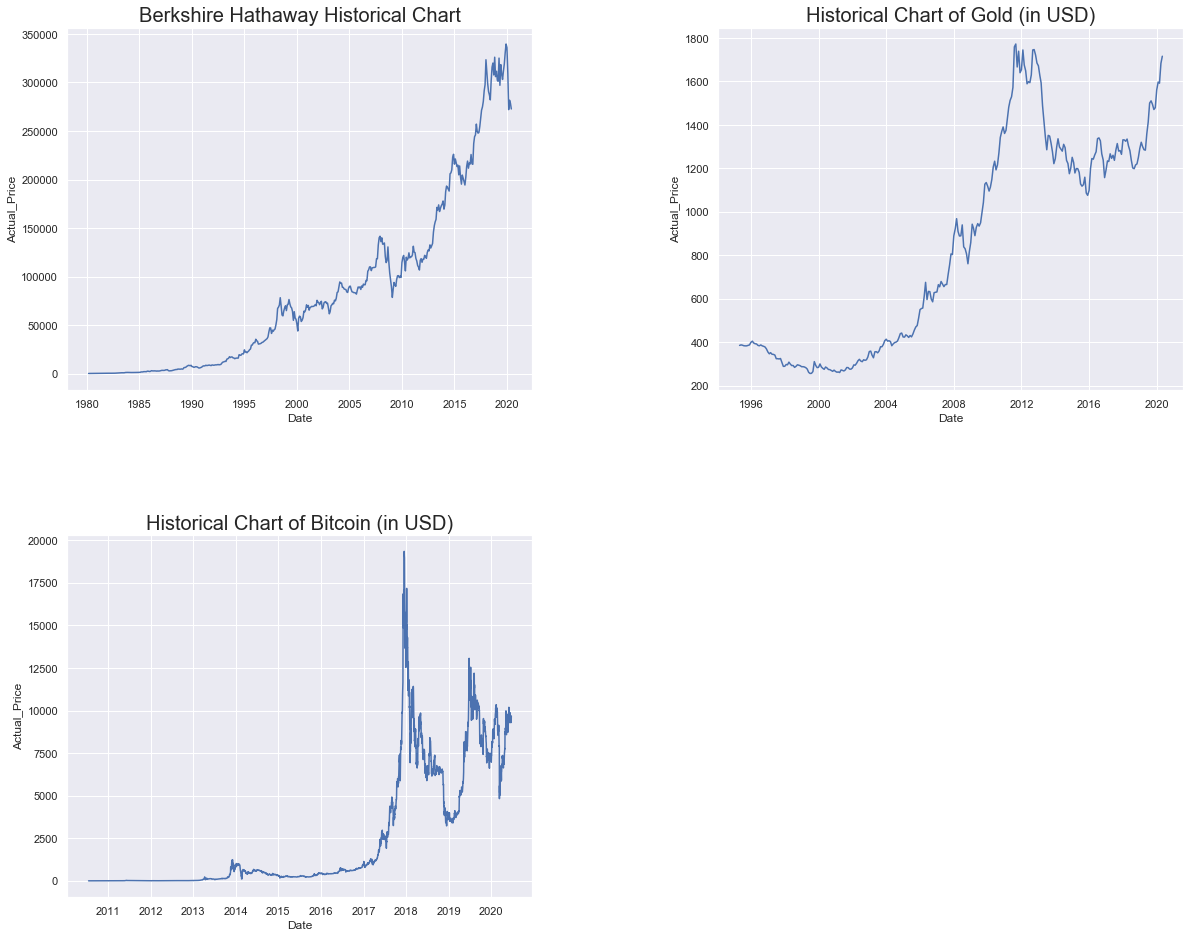

In [361]:
sns.set(rc={'figure.figsize':(20,16)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.lineplot(x='Date', y='Actual_Price', data=BRK_price, ax=ax).set_title('Berkshire Hathaway Historical Chart', size=20)
ax = fig.add_subplot(2, 2, 2)
sns.lineplot(x='Date', y='Actual_Price', data=Gold_price, ax=ax).set_title('Historical Chart of Gold (in USD)', size=20)
ax = fig.add_subplot(2, 2, 3)
sns.lineplot(x='Date', y='Actual_Price', data=BTC_price, ax=ax).set_title('Historical Chart of Bitcoin (in USD)', size=20)
plt.show()

#### Import QE dates and split data accordingly

In [362]:
FED_QE = pd.read_csv("Data/FED-balance.csv")
FED_QE.columns = ['Date','Assets']
FED_QE['Date'] = pd.to_datetime(FED_QE['Date'])

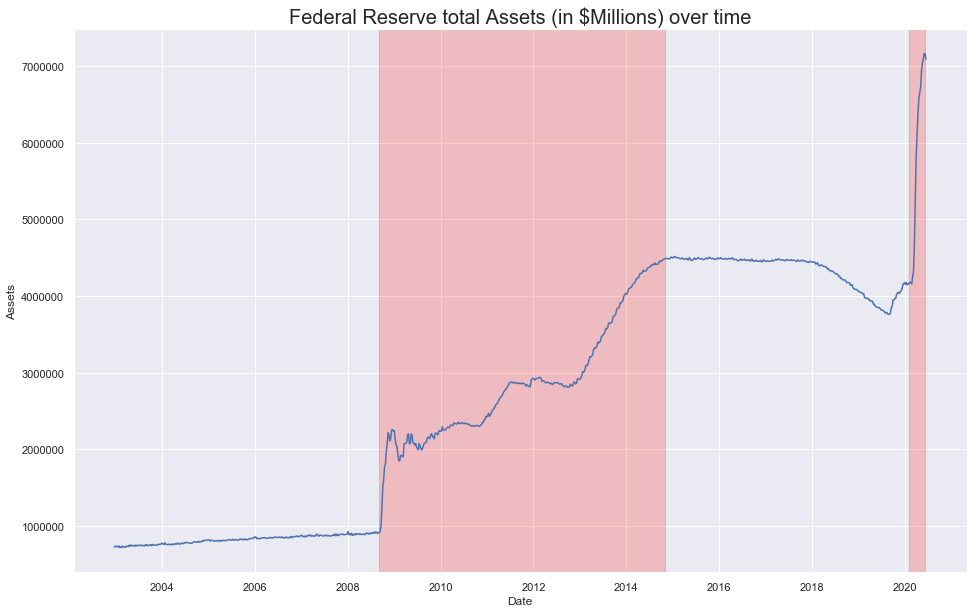

In [363]:
sns.set(rc={'figure.figsize':(16,10)})
sns.lineplot(x='Date', y='Assets',data=FED_QE).set_title('Federal Reserve total Assets (in $Millions) over time',size=20)
# plt.axvline(x=pd.to_datetime('2008-08-01'), color='r')
# plt.axvline(x=pd.to_datetime('2014-06-01'), color='r')
# plt.axvline(x=pd.to_datetime('2020-02-01'), color='r')
plt.axvspan(pd.to_datetime('2008-09-01'), pd.to_datetime('2014-11-01'), alpha=0.2, color='red')
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-06-11'), alpha=0.2, color='red')

### Section: Split data between periods of Quantitative Easing (QE) and Quantitative Tightening (QT) and start performance comparison <br>
#### Compute compounded returns for each asset (Equities, Gold and BTC)

In [364]:
def compute_returns_2004onwards(df):
    df = df.loc[(df['Date']>=pd.to_datetime('2004-02-01')) & (df['Date']<=pd.to_datetime('2020-06-01'))]
    firstPrice = df['Actual_Price'].iloc[0]
    df['DailyReturn'] = (df['Actual_Price']- firstPrice)/firstPrice
    
    return df

In [365]:
def compute_returns(df):
    df = df.loc[(df['Date']>=pd.to_datetime('1995-09-01')) & (df['Date']<=pd.to_datetime('2020-06-01'))]
    firstPrice = df['Actual_Price'].iloc[0]
    df['DailyReturn'] = (df['Actual_Price']- firstPrice)/firstPrice
    
    return df

In [381]:
SPY_data = compute_returns_2004onwards(SPY_price)
SPY_hist = compute_returns(SPY_price)
SPYG_data = compute_returns(SPYG_price)
SPYV_data = compute_returns(SPYV_price)
XLU_data = compute_returns(XLU_price)
Gold_hist = compute_returns(Gold_daily)
SPY_daily = compute_returns(SPY_daily)
BRK_data = compute_returns_2004onwards(BRK_price)
VPU_data = compute_returns_2004onwards(VPU_price)
VTV_data = compute_returns_2004onwards(VTV_price)
VUG_data = compute_returns_2004onwards(VUG_price)
Gold_data = compute_returns_2004onwards(Gold_price)
BTC_data = compute_returns_2004onwards(BTC_price)

BRK_data.shape

/Users/vkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(197, 9)

In [367]:
SPY_data.shape

(197, 14)

In [368]:
def split_data(df):
    df_QT = df.loc[(df['Date'].between(pd.to_datetime('2004-02-01'),pd.to_datetime('2008-09-01'))) 
                             | (df['Date'].between(pd.to_datetime('2014-11-01'),pd.to_datetime('2020-02-01')))]
    
    df_QE = df.loc[(df['Date'].between(pd.to_datetime('2008-09-01'),pd.to_datetime('2014-11-01'))) 
                             | (df['Date'].between(pd.to_datetime('2020-02-01'),pd.to_datetime('2020-06-11')))]
    return df_QT, df_QE

In [369]:
SPY_price_QT, SPY_price_QE = split_data(SPY_price)
BRK_price_QT, BRK_price_QE = split_data(BRK_price)
VPU_price_QT, VPU_price_QE = split_data(VPU_price)
VTV_price_QT, VTV_price_QE = split_data(VTV_price)
VUG_price_QT, VUG_price_QE = split_data(VUG_price)

VUG_price_QE.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Month,Year,Date_y,Dividends,Date,Actual_Price
56,2008-09-01,59.459999,61.500000,49.570000,52.209999,44.884785,15254100,9,2008,2008-09-24,0.138,2008-09-01,45.022785
57,2008-10-01,51.520000,51.759998,36.500000,42.910000,36.985111,27700000,10,2008,NaT,0.000,2008-10-01,36.985111
58,2008-11-01,42.900002,44.290001,32.900002,39.189999,33.778744,20874200,11,2008,NaT,0.000,2008-11-01,33.778744
59,2008-12-01,38.090000,40.020000,35.650002,39.509998,34.054569,25282300,12,2008,2008-12-22,0.168,2008-12-01,34.222569
60,2009-01-01,39.490002,41.560001,36.540001,37.580002,32.530735,20501600,1,2009,NaT,0.000,2009-01-01,32.530735


In [370]:
pas.vol(SPY_data['DailyReturn'])

0.8458419001855846

In [371]:
#def compute_ratios(df1,df2)

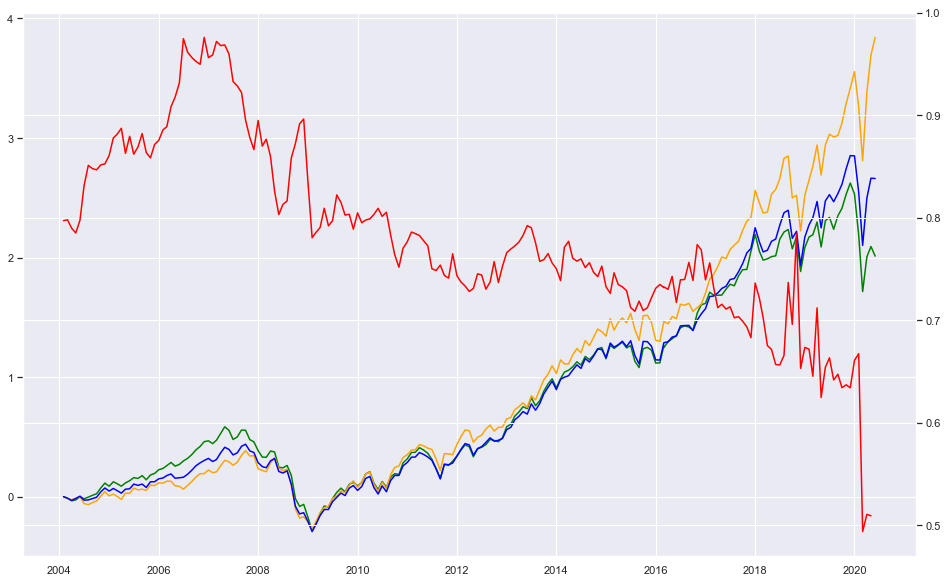

In [372]:
sns.set(rc={'figure.figsize':(16,10)})
fig,ax = plt.subplots()
ax.plot(VTV_data.Date, VTV_data.DailyReturn, color="green")
ax.plot(VUG_data.Date, VUG_data.DailyReturn, color="orange")
ax.plot(SPY_data.Date, SPY_data.DailyReturn, color="blue")
#ax.plot(BRK_data.Date, BRK_data.DailyReturn, color="green")

growth_val = pd.DataFrame({"Date":VTV_data['Date'],"Ratio":VTV_data['Actual_Price']/VUG_data['Actual_Price']})
ax2 = ax.twinx()
ax2.plot(growth_val.Date, growth_val.Ratio, color='red')
plt.show()

In [373]:
BRK_SPY = pd.DataFrame({"Date":VTV_price['Date'],"Ratio":SPY_data['Actual_Price']/BRK_data['Actual_Price']})
BRK_SPY
# plt.plot(SPY_data['Date'], (BRK_data['Actual_Price']/SPY_data['Actual_Price']), color='blue')

,Date,Ratio
0,2004-01-01,NaN
1,2004-02-01,NaN
2,2004-03-01,NaN
3,2004-04-01,NaN
4,2004-05-01,NaN
...,...,...
479,NaT,NaN
480,NaT,NaN
481,NaT,NaN
482,NaT,NaN


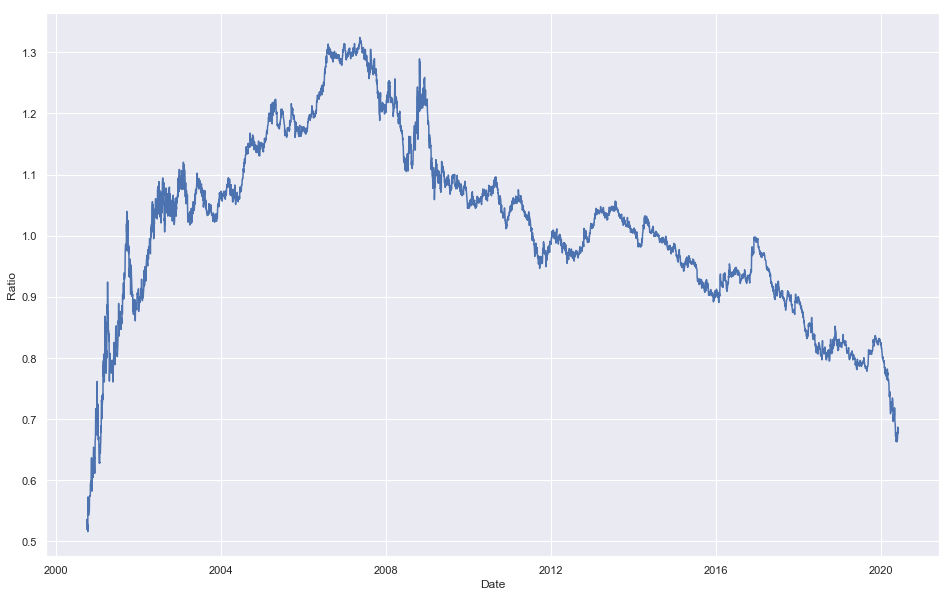

In [374]:
growth_val_daily = pd.DataFrame({"Date":SPYG_data['Date'],"Ratio":SPYV_data['Actual_Price']/SPYG_data['Actual_Price']})
sns.lineplot(x='Date',y='Ratio',data=growth_val_daily)

In [375]:
SPYG_data.head(1000000)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Actual_Price,DailyReturn
0,2000-10-02,24.093750,24.093750,24.093750,24.093750,19.217442,2000,0.0,19.217442,0.000000
1,2000-10-03,23.812500,23.812500,23.812500,23.812500,18.993105,2000,0.0,18.993105,-0.011674
2,2000-10-04,23.812500,23.812500,23.812500,23.812500,18.993105,0,0.0,18.993105,-0.011674
3,2000-10-05,23.531250,23.531250,23.531250,23.531250,18.768785,2000,0.0,18.768785,-0.023346
4,2000-10-06,23.531250,23.531250,23.531250,23.531250,18.768785,0,0.0,18.768785,-0.023346
...,...,...,...,...,...,...,...,...,...,...
4941,2020-05-26,43.330002,43.330002,42.549999,42.610001,42.491798,1544700,0.0,42.491798,1.211106
4942,2020-05-27,42.799999,42.970001,41.930000,42.970001,42.850800,6901300,0.0,42.850800,1.229787
4943,2020-05-28,42.990002,43.610001,42.860001,42.980000,42.860771,1944200,0.0,42.860771,1.230306
4944,2020-05-29,43.000000,43.389999,42.660000,43.250000,43.130020,1744300,0.0,43.130020,1.244316


In [376]:
SPYV_data.head(1000000)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Actual_Price,DailyReturn
0,2000-10-02,16.429688,16.519531,16.429688,16.519531,9.987844,40800,0.0,9.987844,0.000000
1,2000-10-03,16.613281,16.613281,16.613281,16.613281,10.044530,40000,0.0,10.044530,0.005675
2,2000-10-04,16.648438,16.648438,16.648438,16.648438,10.065783,16000,0.0,10.065783,0.007803
3,2000-10-05,16.648438,16.648438,16.648438,16.648438,10.065783,16000,0.0,10.065783,0.007803
4,2000-10-06,16.507813,16.507813,16.435547,16.435547,9.937073,1600,0.0,9.937073,-0.005083
...,...,...,...,...,...,...,...,...,...,...
4941,2020-05-26,29.000000,29.200001,28.930000,28.990000,28.782928,1606300,0.0,28.782928,1.881796
4942,2020-05-27,29.480000,29.650000,29.090000,29.650000,29.438215,3986900,0.0,29.438215,1.947404
4943,2020-05-28,29.920000,29.920000,29.440001,29.510000,29.299215,2507200,0.0,29.299215,1.933487
4944,2020-05-29,29.330000,29.570000,29.030001,29.520000,29.309143,2428000,0.0,29.309143,1.934481


,Date,Ratio
57,1995-09-01,NaN
58,1995-09-05,NaN
59,1995-09-06,NaN
60,1995-09-07,NaN
61,1995-09-08,NaN


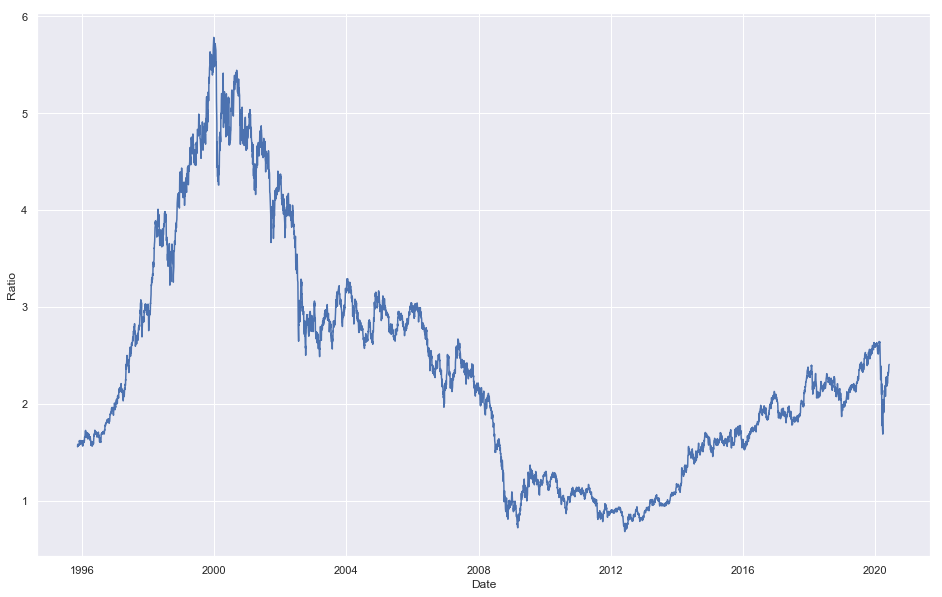

In [391]:
#Gold_vs_SPY = Gold_hist.merge(SPY_hist, left_on='Date',right_on='Date')
Gold_vs_SPY = pd.DataFrame({"Date":SPY_daily['Date'],"Ratio":SPY_daily['Actual_Price']/Gold_hist['Actual_Price']})
sns.lineplot(x='Date',y='Ratio',data=Gold_vs_SPY)
Gold_vs_SPY.head()

In [383]:
Gold_hist.head(100000)

,Date,Actual_Price,DailyReturn
109,1995-09-01,381.80,0.000000
110,1995-09-04,379.85,-0.005107
111,1995-09-05,379.40,-0.006286
112,1995-09-06,379.00,-0.007334
113,1995-09-07,380.55,-0.003274
...,...,...,...
6561,2020-05-26,1722.75,3.512179
6562,2020-05-27,1705.15,3.466082
6563,2020-05-28,1723.30,3.513620
6564,2020-05-29,1725.65,3.519775


In [384]:
SPY_daily.head(100000)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Month,Year,Actual_Price,DailyReturn
57,1995-09-01,561.880005,564.619995,561.010010,563.840027,563.840027,256730000,0.0,NaN,NaN,563.840027,0.000000
58,1995-09-05,563.859985,569.200012,563.840027,569.169983,569.169983,332670000,0.0,NaN,NaN,569.169983,0.009453
59,1995-09-06,569.169983,570.530029,569.000000,570.169983,570.169983,369540000,0.0,NaN,NaN,570.169983,0.011227
60,1995-09-07,570.169983,571.109985,569.229980,570.289978,570.289978,321720000,0.0,NaN,NaN,570.289978,0.011439
61,1995-09-08,570.289978,572.679993,569.270020,572.679993,572.679993,317940000,0.0,NaN,NaN,572.679993,0.015678
...,...,...,...,...,...,...,...,...,...,...,...,...
6281,2020-05-26,3004.080078,3021.719971,2988.169922,2991.770020,2991.770020,5837060000,0.0,NaN,NaN,2991.770020,4.306062
6282,2020-05-27,3015.649902,3036.250000,2969.750000,3036.129883,3036.129883,6371230000,0.0,NaN,NaN,3036.129883,4.384736
6283,2020-05-28,3046.610107,3068.669922,3023.399902,3029.729980,3029.729980,5402670000,0.0,NaN,NaN,3029.729980,4.373386
6284,2020-05-29,3025.169922,3049.169922,2998.610107,3044.310059,3044.310059,7275080000,0.0,NaN,NaN,3044.310059,4.399244
